#### Keywords
1. regression - แปลว่าถดถอย ในที่นี้แปลว่า Model ที่ค่าขึ้นกับค่าอะไรบางอย่างในอดีต (ที่ไม่ใข่ตัวเอง)
1. autoregression - ถดถอยด้วยตัวเอง ในที่นี้แปลว่า Model ที่ค่าปัจจุบันขึ้นกับค่าของตัวเองในอดีต
1. coefficients - ค่าสัมประสิทธิ์
2. correlation - ตัวแปรต้นส่งผลต่อตัวแปรตามเท่านั้น เช่น $y = 3x_{1}+2x_{2}$ โดยที่ $x_{1},x_{2}$ เป็นอิสระต่อกัน 
3. autocorrelation - นอกจากตัวแปรต้นส่งผลต่อตัวแปรตามแล้ว ยังส่งผลต่อตัวแปรต้นด้วยกันเองอีก เช่น $y = 3x_{1}+5x_{2}$ แล้ว $x_{1} = 5x_{2}$ ($x_{1},x_{2}$ ไม่เป็นอิสระต่อกัน)
2. Least mean squares (LMS) - 
3. rms (root mean squar error)
4. mean absolute error
5. Symmetric Mean absolute percentage error 
6. Coefficient of determination

## Autoregressive Model

> Autoregressive model สามารถใช้อธิบาย**สัญญาณทางเวลา (time series)** รวมถึงใช้ในการทำนายค่าของสัญญาณในอนาคตได้

#### Assumptions
1. a variable is assumed to depend on its previous values. ค่าของสัญญาณแต่ละเวลาขึ้นอยู่กับค่าของสัญญาณในอดีตก่อนตัวมัน ดังนั้นหากจะใช้ model นี้ เพื่อทำนายค่าในอนาคต เราต้องสังเกต(ใช้)ค่าจาก input เดียวกัน ในอดีตได้ด้วย
2. The relation is also assumed to be linear. มีความสัมพันธ์กับค่าของสัญญาณในอดีตแบบ Linear

#### Requirements
1. หาค่า order ที่เหมาะสมของ model
2. หาค่า parameter ของ data

#### Formula
$$ x_{t} = c + \Sigma_{i=1}^{p}a_{i}x_{t-i} + e_{t} $$

เมื่อ 
   * $x_{t}$ คือค่าของสัญญาณที่เวลา $t$
   * $c$ คือค่าคงที่
   * $a_{i}$ คือพารามิเตอร์ที่ order $i$ ที่หาได้จากการ optimzing the model โดยการ train data
   * $p$ คือ จำนวนค่าในอดีตก่อนหน้าไกลสุดที่มีผลต่อค่า $x_{t}$ เช่น $p=7$ หมายความว่า ค่าปัจจุบัน $x_{t}$ ขึ้นกับค่าในอดีตก่อนหน้า 7 ค่า คือ มี order = 7 (order อาจใช้ $AIC$, **$BIC$** ในการหา)
   * $e_{t}$ คือ white noise (สัญญาณรบกวนที่ random ค่าและมี Distribution การกระจายตัวเป็นแบบ normal)
   


## Autocorrelation

ความสัมพันธ์ระหว่างตัวแปร(variables) เรียกว่า correlation.
เมื่อตัวแปรทั้งสองเปลี่ยนไปในทิศทางเดียวกัน เรียกว่า positive correlation.
แต่ถ้าเปลี่ยนไปในทางตรงกันข้าม เรียกว่า negative correlation.

เราสามารถใช้วิธีการทางสถิติวัด correlation ระหว่าง
* output variable และค่าของสัญญาณในอดีต พิจารณากับ lags หลายๆค่า
* output variable และค่าของ lags แต่ละค่า

AR model ที่ correlation นั้นพิจารณาค่า**ระหว่าง variable และตัวมันเองในอดีต** ซึ่งเรียกว่า autocorrelation 

> สถิติความสัมพันธ์ (correlation statistics) ยังสามารถช่วยในการเลือกตัวแปร ($p$) ที่มีและไม่มีประโยขน์ต่อค่าใน Model ได้ด้วย

**โดยเมื่อ lag variable ทุกตัวมีค่า correlation น้อย หรือไม่มีเลยกับค่า output variable นั่นหมายความว่าสัญญาณทางเวลานี้อาจจะไม่สามารถ predict ได้ด้วยข้อมูลของตัวมันเอง** ซึ่งนี่มีประโยชน์มากตอนเริ่มทำงานกับ Dataset ชุดใหม่

## Solution
1. explore time series data เพื่อพิจารณา autocorrelation.
2. develop an autocorrelation model และ ใช้มัน predictions.
3. ใช้ autocorrelation model ที่ได้จากข้อ 3. เพื่อสร้าง rolling predictions.

*เราจะ estimate model parameters จาก sample ข้อมูลบางส่วน (80%) แล้วเก็บข้อมูลบางส่วนไว้ test (20%) และตรวจสอบ model เพื่อไม่ให้เกิดเหตุการณ์ perfect fit (overfitting)*

## 1. Explore time series data for autocorrelation

**ตัวอย่าง** : ข้อมูลอุณหภูมิต่ำสุดในช่วงเวลา 10 ปี (1981-1990) ของเมือง Melbourne, Australia.

*หน่วยของอุณหภูมิคือ $^{o}C$ มีคนวัด 3,650 คน ที่มา [Australian Bureau of Meteorology](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line)* 

Params [ 0.67172672  0.33626295]
Root mean square error 22.8148122613
Mean absolute error 17.6515446503
Mean absolute percentage error 60.7817800736
Symmetric Mean absolute percentage error 34.9843386176
Coefficient of determination 0.799940292779


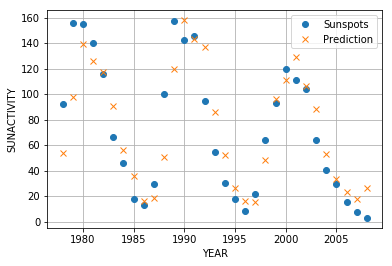

In [20]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# value from model
def model(p, x1, x10):
   p1, p10 = p
#    print(p1)
#    print(p10)
   return p1 * x1 + p10 * x10

# difference between data and model
def error(p, data, x1, x10):
   return data - model(p, x1, x10)

# เพื่อ fit data เริ่มจาก leastsq() กำลังสองน้อยสุด SD minimize
def fit(data):
   p0 = [.5, 0.5]
   params = leastsq(error, p0, args=(data[10:], data[9:-1], data[:-10]))[0]
   return params

# Data
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

# use 0.9 of data for train model
cutoff = int(.9 * len(sunspots))
# train data
params = fit(sunspots[:cutoff])

#Parameter of model
print("Params", params)


pred = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()
